# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat9"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [7]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 0.6287867426872253
Epoch 1, Loss 0.6509235203266144
Epoch 2, Loss 0.6556109189987183
Epoch 3, Loss 0.6738203167915344
Epoch 4, Loss 0.5886240750551224
Epoch 5, Loss 0.6189657747745514
Epoch 6, Loss 0.601572185754776
Epoch 7, Loss 0.6374153792858124
Epoch 8, Loss 0.6806716620922089
Epoch 9, Loss 0.6546790301799774
Epoch 10, Loss 0.6424921751022339
Epoch 11, Loss 0.6330125331878662
Epoch 12, Loss 0.6363029181957245
Epoch 13, Loss 0.626722127199173
Epoch 14, Loss 0.6576352119445801
Epoch 15, Loss 0.6695477068424225
Epoch 16, Loss 0.6174457669258118
Epoch 17, Loss 0.665231853723526
Epoch 18, Loss 0.6370500922203064
Epoch 19, Loss 0.6713692843914032
Epoch 20, Loss 0.5824887007474899
Epoch 21, Loss 0.6519237756729126
Epoch 22, Loss 0.6782308220863342
Epoch 23, Loss 0.6174302399158478
Epoch 24, Loss 0.6104720234870911
Epoch 25, Loss 0.636423796415329
Epoch 26, Loss 0.6781747043132782
Epoch 27, Loss 0.6772482991218567
Epoch 28, Loss 0.6838155388832092
Epoch 29, Loss 0.69037207961

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

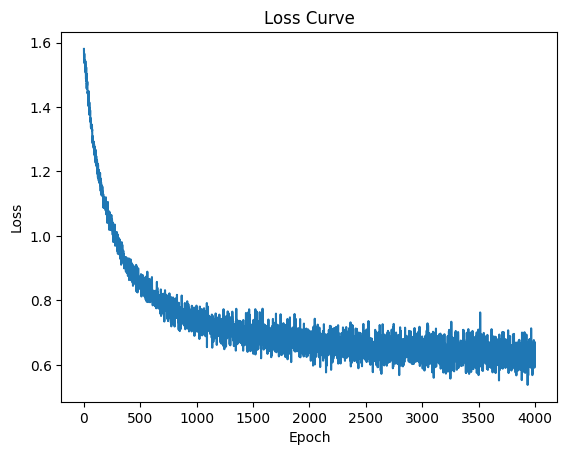

In [8]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 86.66666666666667%
Accuracy for class 1 = 77.77777777777777%
Overall accuracy = 83.33333333333333%
Accuracy for class 0 = 84.12698412698413%
Accuracy for class 1 = 81.81818181818181%
Overall accuracy = 83.33333333333333%


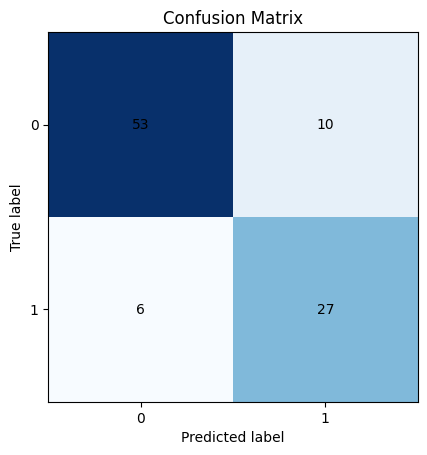

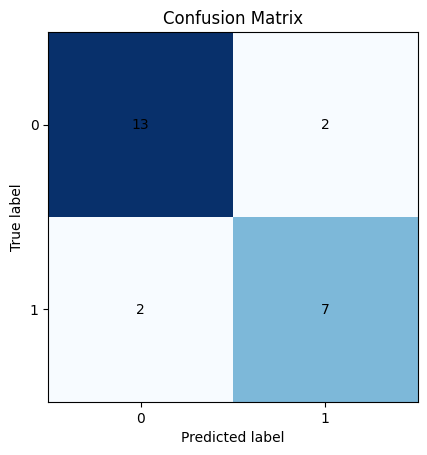

In [9]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

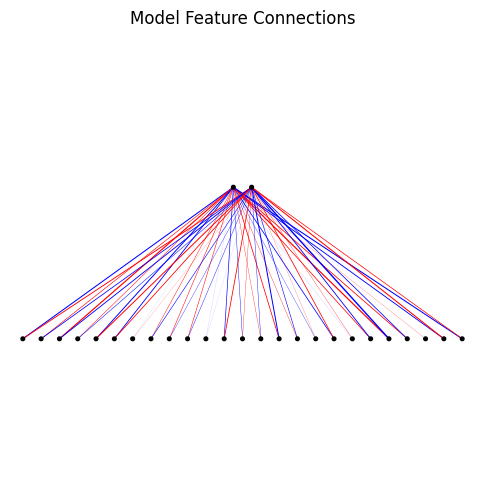

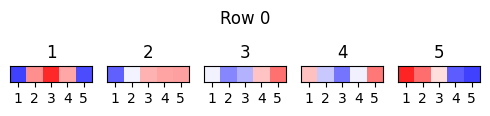

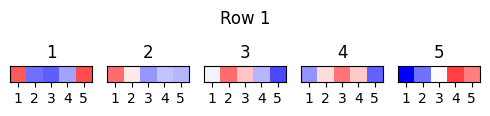

In [10]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)